<a href="https://colab.research.google.com/github/Mostafa772/Network_analysis/blob/main/coauthership_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cdlib

     |████████████████████████████████| 228 kB 6.8 MB/s 
     |████████████████████████████████| 14.2 MB 6.3 MB/s 
     |████████████████████████████████| 50 kB 3.4 MB/s 
     |████████████████████████████████| 2.6 MB 9.0 MB/s 
     |████████████████████████████████| 3.1 MB 42.5 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=d23d7cf4868621b269e55a416a496c73571bff9bab3f00a22dfa6e6c150254ea
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149863 sha256=c3b4cff54354d10d8dfaedd656dafb658af231101f23d42c337923b98955b4f9
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built pyclustering python-Levenshtein


In [ ]:
pip install leidenalg

     |████████████████████████████████| 1.3 MB 7.4 MB/s 


In [ ]:
import pandas as pd
from random import random, seed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import community
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter
from cdlib import algorithms    
import csv
from tqdm import tqdm
from matplotlib.cm import ScalarMappable
# from networkx.algorithms import community
# from networkx.algorithms.community.centrality import girvan_newman

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'wurlitzer', 'graph_tool', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [ ]:
G = nx.read_gml('netscience.gml')
plt.figure(1, figsize=(200, 80), dpi=60)
nx.draw(G, with_labels=True, font_weight='normal', node_size = 10)

In [ ]:
G.number_of_nodes()

1589

396
[4, 5, 8, 8, 3, 1, 3, 7, 1, 3, 379, 6, 1, 2, 3, 31, 3, 57, 8, 3, 8, 1, 3, 1, 3, 4, 2, 1, 2, 1, 6, 5, 3, 1, 2, 2, 10, 4, 1, 2, 2, 3, 1, 4, 3, 4, 1, 3, 2, 6, 5, 1, 2, 5, 3, 3, 3, 4, 1, 1, 2, 7, 6, 14, 3, 1, 28, 1, 4, 2, 2, 1, 6, 4, 3, 1, 12, 2, 4, 3, 7, 4, 13, 4, 7, 3, 5, 3, 3, 3, 3, 8, 4, 4, 1, 6, 2, 1, 3, 3, 3, 2, 3, 3, 4, 1, 8, 5, 5, 14, 2, 2, 7, 2, 1, 2, 1, 2, 2, 2, 2, 7, 2, 1, 8, 1, 2, 1, 3, 1, 3, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 4, 2, 1, 2, 1, 1, 1, 2, 2, 3, 2, 2, 4, 2, 1, 3, 4, 1, 21, 2, 1, 4, 9, 2, 6, 2, 3, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 2, 4, 2, 1, 1, 3, 1, 6, 2, 1, 2, 3, 2, 3, 4, 10, 3, 1, 8, 4, 2, 3, 1, 3, 1, 1, 1, 6, 1, 1, 5, 2, 3, 2, 3, 1, 5, 4, 3, 2, 3, 1, 2, 3, 1, 3, 1, 3, 4, 2, 4, 3, 3, 6, 1, 2, 3, 2, 1, 2, 5, 1, 2, 3, 2, 2, 1, 9, 1, 1, 2, 2, 4, 3, 1, 2, 5, 1, 11, 1, 1, 1, 2, 1, 1, 1, 4, 3, 1, 3, 1, 2, 8, 1, 2, 2, 2, 2, 4, 1, 1, 5, 1, 9, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 4, 1, 2, 1, 3, 4, 2, 2, 2, 2, 2, 3, 2, 3, 4, 1, 1, 1, 1, 9, 1, 5

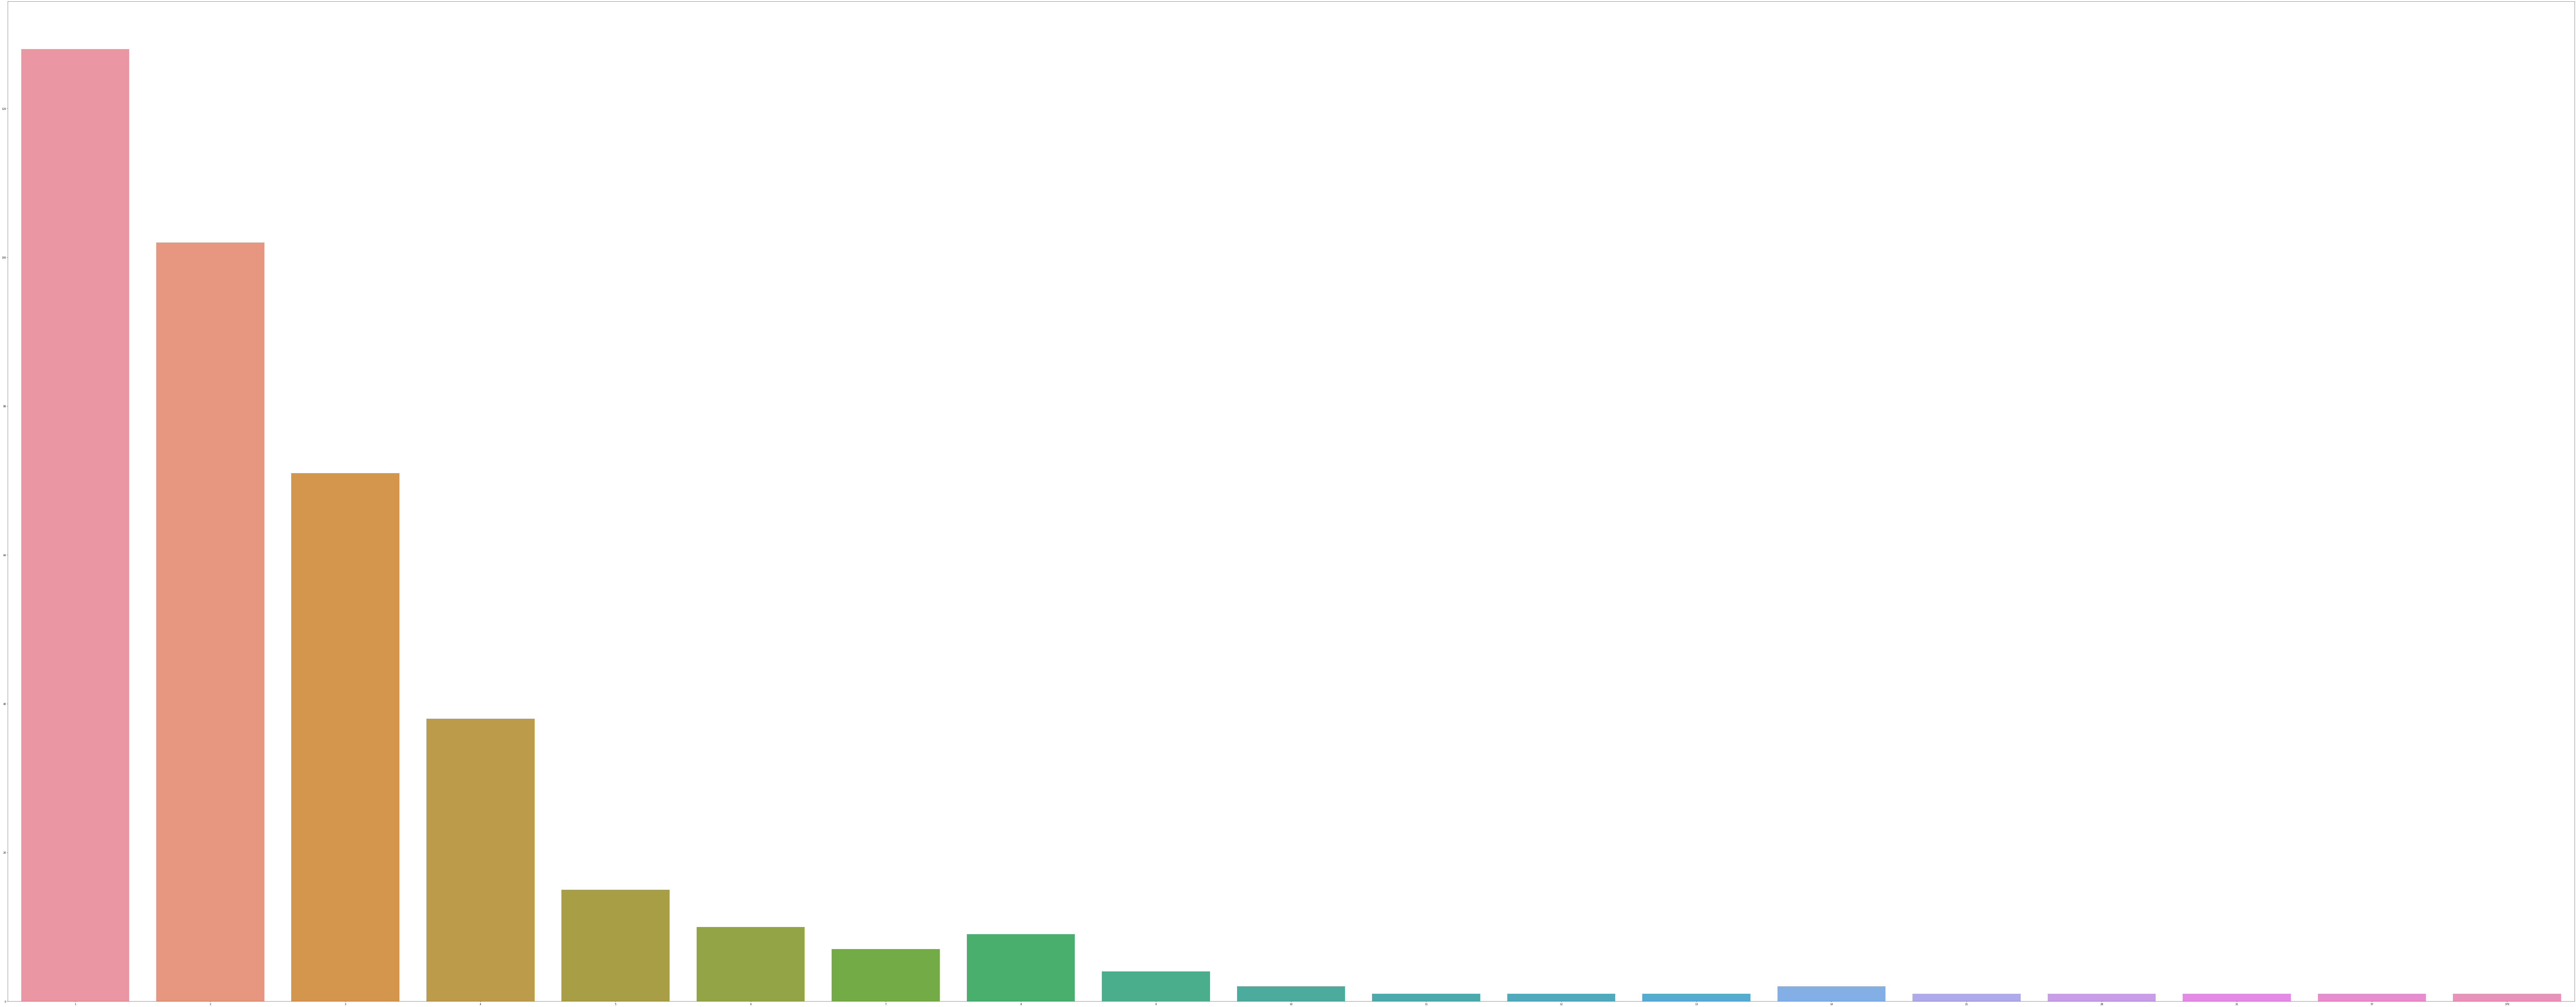

connected_comp_size  frequency  percentage
4                     1        128   32.323232
8                     2        102   25.757576
3                     3         71   17.929293
0                     4         38    9.595960
1                     5         15    3.787879
7                     6         10    2.525253
5                     7          7    1.767677
2                     8          9    2.272727
17                    9          4    1.010101
11                   10          2    0.505051

In [ ]:
"""Here we are calculating the number of connected components 
and we are viewing the size of each component"""

import collections
from itertools import groupby

G = nx.read_gml('netscience.gml')
plt.figure(1, figsize=(200, 80), dpi=60)

# nx.draw_spring(G, node_size = 1000)
# print(nx.number_connected_components(G))  
# for item in nx.connected_components(G):
#   print(len(item))

nodes = []
number_of_connected_componenets = 0
for x in nx.connected_components(G):
  number_of_connected_componenets+=1
  nodes.append(len(x))

print(number_of_connected_componenets)
print(nodes)

counter=collections.Counter(nodes)
# print(counter)
connected_comps_freq_df = pd.DataFrame.from_dict({"connected_comp_size": counter.keys(), "frequency":counter.values()})
connected_comps_freq_df["percentage"] = [(item/number_of_connected_componenets * 100) for item in counter.values()]
keys = list(counter.keys())

# get values in the same order as keys, and parse percentage values
vals = [float(counter[k]) for k in keys]

sns.barplot(x=keys, y=vals)
sns.set(font_scale = 5)
plt.show()
connected_comps_freq_df.sort_values(by='connected_comp_size').head(10)

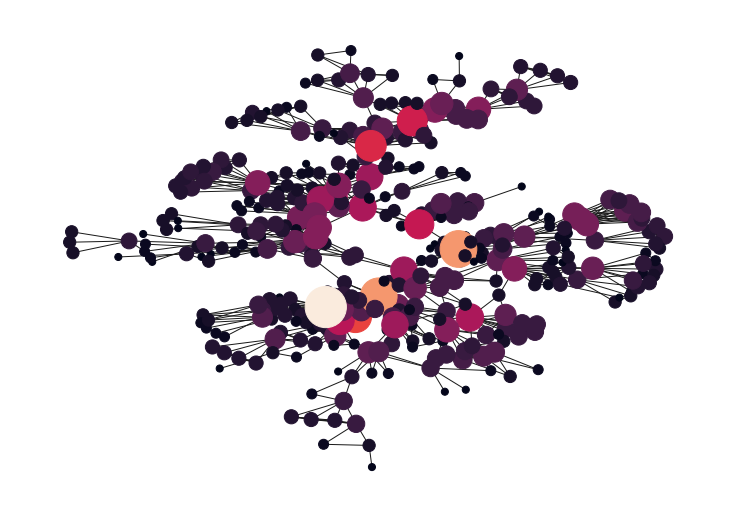

In [ ]:
"""G0 is the sub graph with the biggest component and the graph down represents this componenet 
with node side relative to the degree of the node"""

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
plt.figure(figsize=(10,7))
node_color = [100*G0.degree(v) for v in G0]
node_size = [50*G0.degree(v) for v in G0]
nx.draw_kamada_kawai(G0,node_size = node_size, node_color = node_color)
degrees = []
for v in G0:
  degrees.append(G0.degree(v))
# print(degrees)

G_sub = nx.Graph(G0)

In [ ]:
# Centrality Metrics

# Calculating Centrality metrics for the Graph G_sub

dict_degree_centrality = nx.degree_centrality(G_sub)
dict_betweenness_centrality = nx.betweenness_centrality(G_sub)
dict_eigenvector_centrality = nx.eigenvector_centrality(G_sub)

# Top 10 nodes with the largest values of degree centrality in descending order
dict(sorted(dict_degree_centrality.items(), key=lambda x: x[1], reverse=True)[0:10])
degree_cent_df = pd.DataFrame.from_dict({"scientist": dict_degree_centrality.keys(), "degree_cent_val":dict_degree_centrality.values()})
# degree_cent_labels = {}
# for x in degree_cent_df["scientist"][0:10]:
#   degree_cent_labels[x] = x
# print(eigenvector_centrality_labels)
degree_cent_df = degree_cent_df.sort_values(by= ["degree_cent_val"], ascending=False)
degree_cent_df.head(10)


scientist  degree_cent_val
339        BARABASI, A         0.089947
244           JEONG, H         0.071429
352          NEWMAN, M         0.071429
117          OLTVAI, Z         0.055556
340      BOCCALETTI, S         0.050265
319          KURTHS, J         0.047619
264            SOLE, R         0.044974
154          VICSEK, T         0.042328
36   PASTORSATORRAS, R         0.039683
27           LATORA, V         0.039683

In [ ]:
# Top 10 nodes with the largest values of closeness centrality in descending order
dict(sorted(dict_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[0:10])
closeness_centrality_df = pd.DataFrame.from_dict({"scientist": dict_betweenness_centrality.keys(), "betweenness_centrality":dict_betweenness_centrality.values()})
closeness_centrality_df = closeness_centrality_df.sort_values(by= ["betweenness_centrality"], ascending=False)
# closness_centrality_labels = {}
# for x in closeness_centrality_df["scientist"][0:10]:
#   closness_centrality_labels[x] = x
closeness_centrality_df.head(10)

scientist  betweenness_centrality
352          NEWMAN, M                0.397184
36   PASTORSATORRAS, R                0.345147
162          MORENO, Y                0.286020
264            SOLE, R                0.270163
340      BOCCALETTI, S                0.255428
244           JEONG, H                0.250628
192           HOLME, P                0.231654
315      CALDARELLI, G                0.221549
145        BIANCONI, G                0.174878
280         CAPOCCI, A                0.174686

In [ ]:
# Top 10 nodes with the largest values of eigenvector centrality in descending order
dict(sorted(dict_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[0:10])
eigenvector_centrality_df = pd.DataFrame.from_dict({"scientist": dict_eigenvector_centrality.keys(), "eigenvector_centrality":dict_eigenvector_centrality.values()})
eigenvector_centrality_df = eigenvector_centrality_df.sort_values(by= ["eigenvector_centrality"], ascending=False)
# eigenvector_centrality_labels = {}
# for x in eigenvector_centrality_df["scientist"][0:10]:
#   eigenvector_centrality_labels[x] = x
# print(eigenvector_centrality_labels)
eigenvector_centrality_df.head(10)

scientist  eigenvector_centrality
339  BARABASI, A                0.414299
244     JEONG, H                0.356208
117    OLTVAI, Z                0.346450
154    VICSEK, T                0.255743
298    RAVASZ, E                0.236954
146      NEDA, Z                0.218244
33   SCHUBERT, A                0.218244
207   DERENYI, I                0.218244
219    FARKAS, I                0.218244
363    TOMBOR, B                0.147050

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


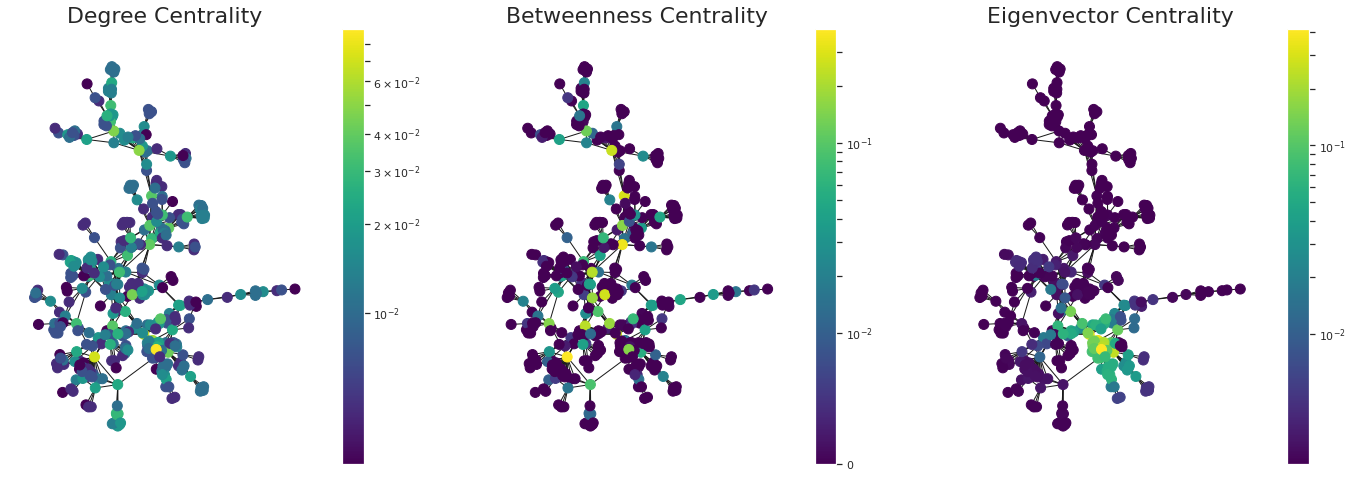

In [ ]:
# Function to plot the graphs for each centrality metric
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    sns.set(font_scale = 1)    
    nodes=nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis, 
                                 node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

pos = nx.spring_layout(G_sub)
plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G_sub).values():
    list_pos_values.append(i)
list_pos_keys=[]    
for i in nx.degree_centrality(G_sub).keys():
    list_pos_keys.append(i)
draw(G_sub, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

plt.subplot(1,3,2)
list_pos_values=[]
for i in nx.betweenness_centrality(G_sub).values():
    list_pos_values.append(i)
list_pos_keys=[]
for i in nx.betweenness_centrality(G_sub).keys():
    list_pos_keys.append(i)
draw(G_sub, pos,list_pos_values, list_pos_keys, 'Betweenness Centrality')

plt.subplot(1,3,3)
list_pos_values=[]
for i in nx.eigenvector_centrality(G_sub).values():
    list_pos_values.append(i)
list_pos_keys=[]
for i in nx.eigenvector_centrality(G_sub).keys():
    list_pos_keys.append(i)
draw(G_sub, pos,list_pos_values, list_pos_keys, 'Eigenvector Centrality')
plt.savefig('centrality_summary.png' , dpi=400)

In [ ]:
import functools

cliques = list(nx.find_cliques(G_sub))

num_cliques = len(cliques)
ls_len_cliqs = [len(cliq) for cliq in cliques ]
max_clique_size = max(ls_len_cliqs)
avg_clique_size = np.mean(ls_len_cliqs)
max_cliques = [c for c in cliques if len(c) == max_clique_size]
max_clique_sets = [set(c) for c in max_cliques]
people_in_max_cliques = list(functools.reduce(lambda x,y: x.intersection(y), max_clique_sets))

print(num_cliques)
print(max_clique_size)
print(avg_clique_size)


203
9
3.5566502463054186


In [ ]:
max_cliques

[['BARABASI, A',
  'OLTVAI, Z',
  'JEONG, H',
  'RAVASZ, E',
  'VICSEK, T',
  'DERENYI, I',
  'SCHUBERT, A',
  'NEDA, Z',
  'FARKAS, I']]

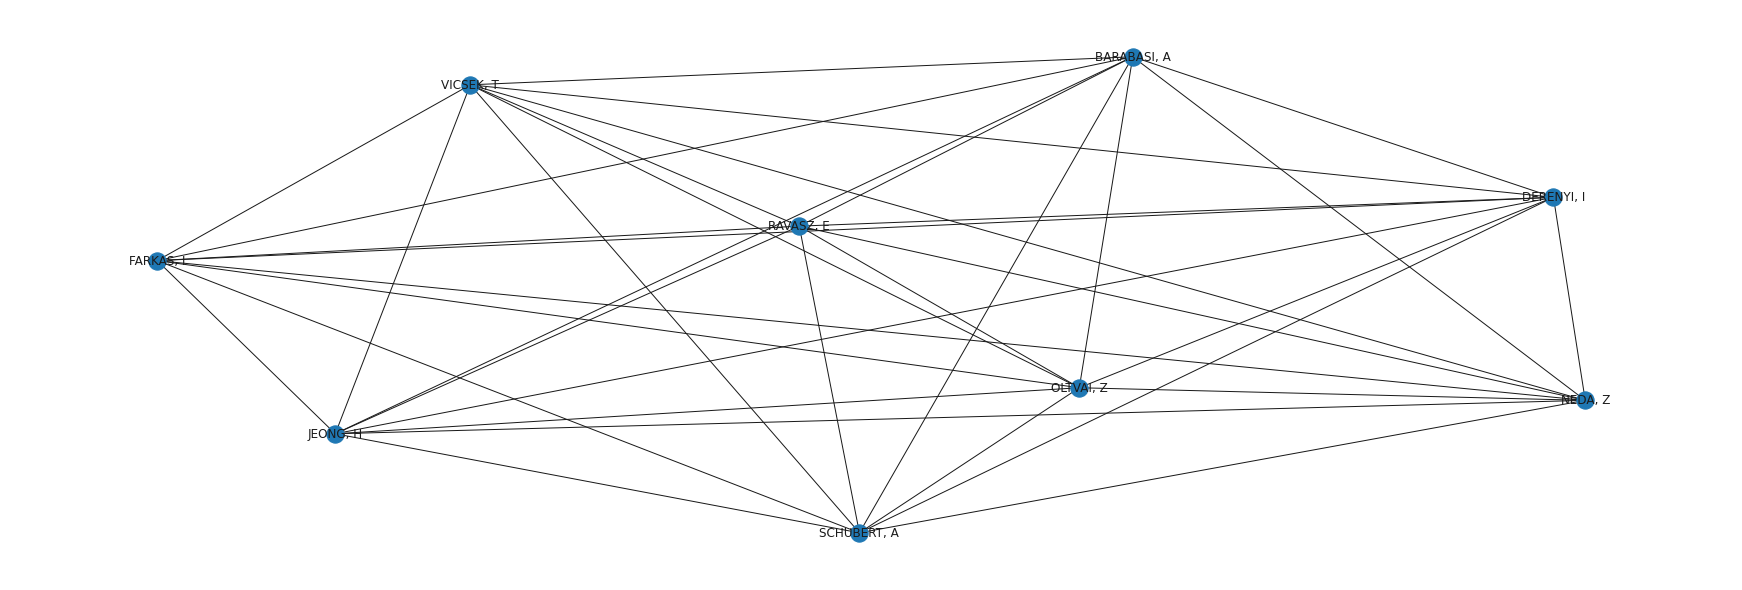

In [ ]:
graph_max_clique = G.subgraph(max_cliques[0])
nx.draw(graph_max_clique, with_labels=True)                



---


**Louvain community detection algorithm**

---



(0.0, 1.0, 0.0, 1.0)

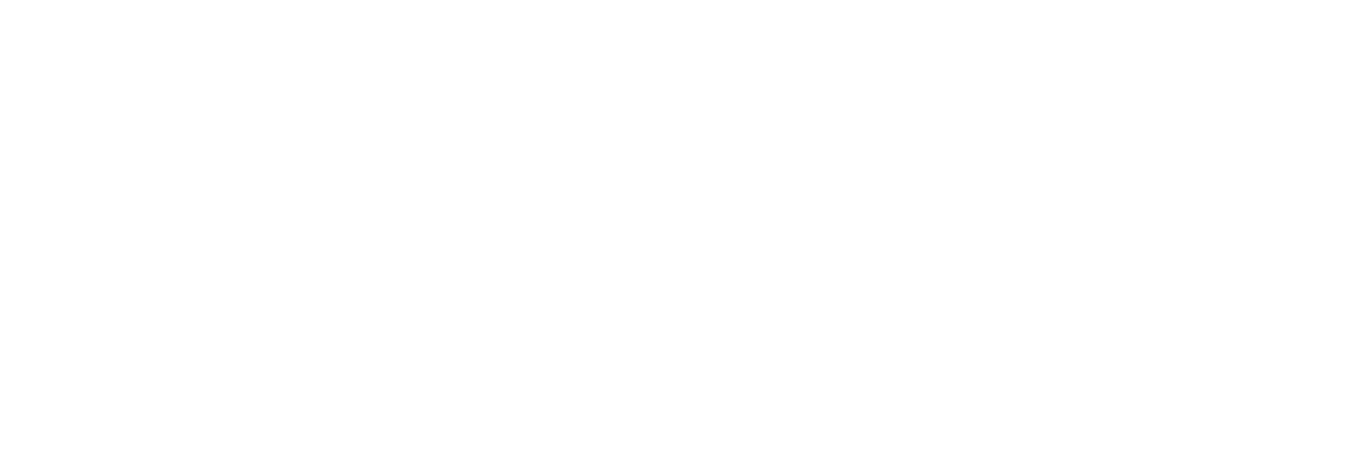

In [ ]:
import community.community_louvain as community_louvain
dict_clusters = community_louvain.best_partition(G_sub)
clusters = [dict_clusters.get(node) for node in G_sub.nodes()]
plt.axis("off")


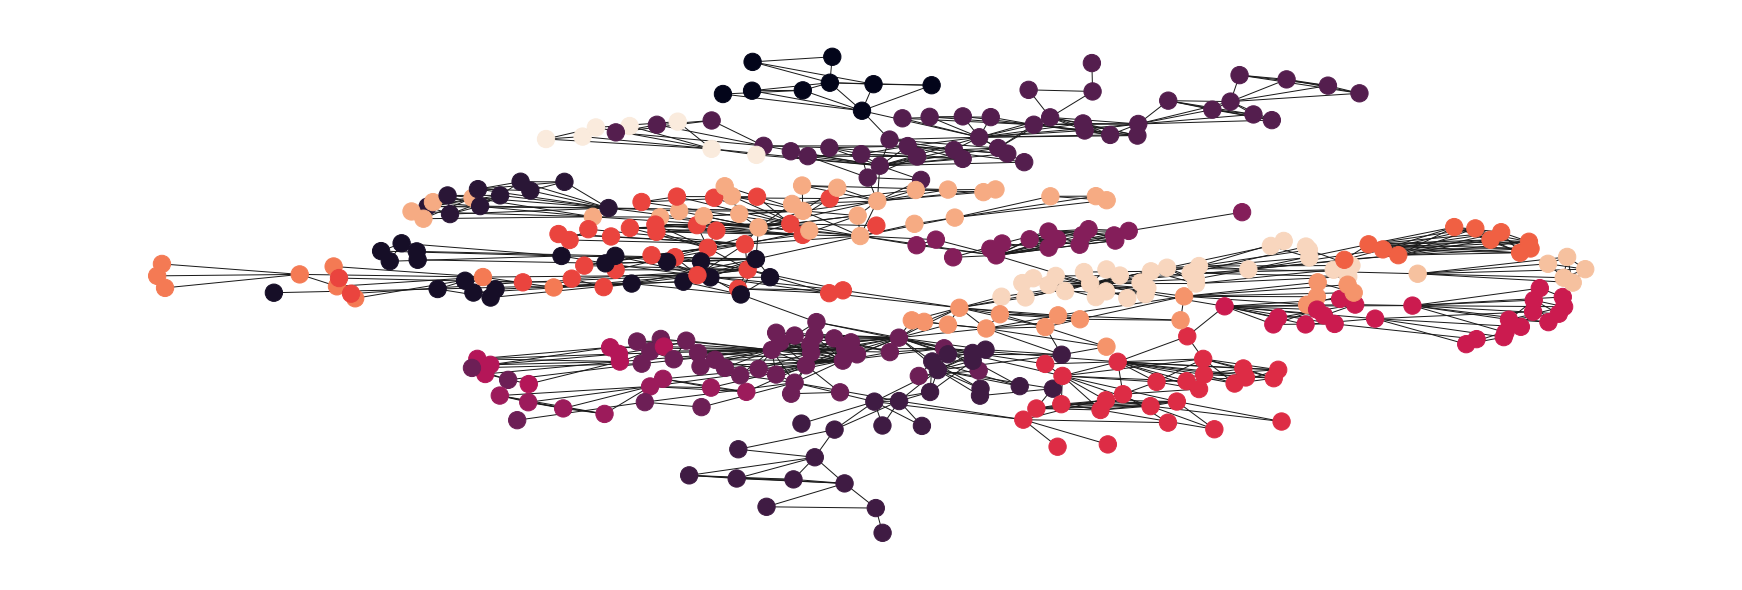

In [ ]:
nx.draw_kamada_kawai(G_sub, node_color=clusters, with_labels=False)

In [ ]:
import operator
new_ma_val = max(dict_clusters.items(), key=operator.itemgetter(1))[-1]
print(f"the number of communities we got is : %s"%(new_ma_val))

the number of communities we got is : 18




---
**clustering coefficients**

---




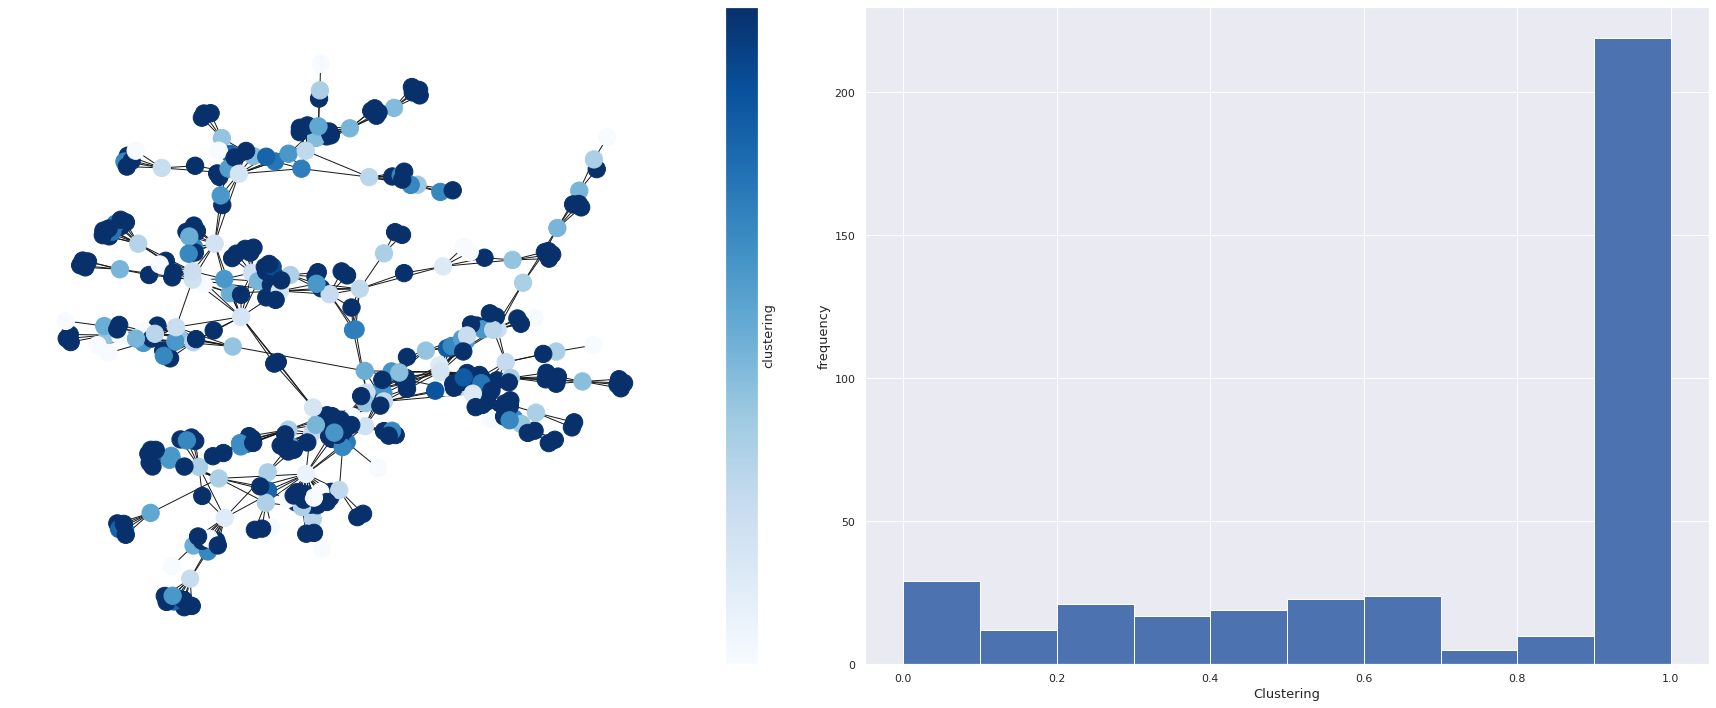

In [ ]:
list_of_clustering_coefficients = nx.clustering(G_sub)
# print(list_of_clustering_coefficients)

cmap = plt.get_cmap("Blues")
norm = plt.Normalize(0, max(list_of_clustering_coefficients.values()))
node_colors = [cmap(norm(list_of_clustering_coefficients[node])) for node in G_sub.nodes]

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(24, 10))
nx.draw_spring(G_sub, node_color=node_colors, with_labels=False, ax=ax1)
cbar = fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), ticks=None, ax=ax1)
cbar.set_label(label = "clustering", fontsize=13)
cbar.set_ticks([])

ax2.hist(list_of_clustering_coefficients.values(), bins=10)
ax2.set_xlabel("Clustering", fontsize = 13)
ax2.set_ylabel("frequency", fontsize = 13)

plt.tight_layout()
plt.show()

In [ ]:
weighted_degrees = dict(nx.degree(G_sub))
# print(weighted_degrees['weight'])
nx.degree(G_sub)

DegreeView({'LIU, Z': 3, 'PIETRONERO, L': 5, 'RODRIGUEZITURBE, I': 4, 'BASSLER, K': 6, 'RUDZICK, O': 2, 'MOUKARZEL, C': 2, 'KOVACS, B': 4, 'MONTOYA, J': 1, 'CHAKRABORTI, A': 4, 'PARK, E': 3, 'TIMMERMANN, L': 5, 'FRONCZAK, P': 2, 'FRASCA, M': 7, 'MONTUORI, M': 3, 'GIRALT, F': 4, 'RAJAGOPALAN, S': 11, 'SZABO, G': 2, 'SCHAFER, C': 3, 'KORNISS, G': 4, 'SCHNITZLER, A': 12, 'LEE, D': 3, 'GUIMERA, R': 11, 'MOREIRA, A': 2, 'SIMONSEN, I': 3, 'GOLTSEV, A': 2, 'GLOVER, E': 4, 'ZALIZNYAK, A': 2, 'LATORA, V': 15, 'KUNTZ, P': 7, 'CHAVEZ, M': 4, 'KRAPIVSKY, P': 9, 'SPATA, A': 3, 'MARRO, J': 4, 'SCHUBERT, A': 8, 'PORTER, M': 3, 'BOTTACCIO, M': 3, 'PASTORSATORRAS, R': 15, 'GIACOMETTI, A': 4, 'HEAGY, J': 2, 'GAUTRAIS, J': 6, 'PLUCHINO, A': 2, 'SALAZARCIUDAD, I': 2, 'CAMACHO, J': 2, 'BATTISTON, S': 5, 'ANCELMEYERS, L': 3, 'ALAVA, M': 2, 'ARECCHI, F': 6, 'HOLYST, J': 6, 'VALLADARES, D': 6, 'MAKSE, H': 2, 'YEUNG, M': 1, 'YUSONG, T': 3, 'TIERI, P': 6, 'DIAZGUILERA, A': 15, 'ALMAAS, E': 9, 'JUNG, S': 2, 'ALE

In [ ]:
def plot_G(G,pos,infection_times,t):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    plt.figure()
    plt.axis('off')
    plt.title('Scientists infection network, t={}'.format(t),fontsize = 24)

    for node in G.nodes():
        size = 100*weighted_degrees[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#feba02')
        elif infection_times.get(node,9999999)<t:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='black')
        else:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')
    nx.draw_networkx_labels(G,pos,{n:n.replace('-','\n') for n in G.nodes() if weighted_degrees[n]>100},font_size=10);

    for e in G.edges(data=True):
        if e[2]['value']>0.01:
            nx.draw_networkx_edges(G,pos,[e],width=e[2]['value'],edge_color='#707070')

In [ ]:
# infection_times = {"aeee":1,"aqwrr":1,"eqwa":1,"aadsf":1,"aadsg":1,"asgdg":1,"asd":1,"afg":1,"as":1,"s":1,"c":1,"b":1}
# infection_times.get(node,9999999)
# print(G_sub.nodes())
# for node
# print(dict_degree_centrality)
# for x in dict_degree_centrality.values():
  # print(x)
max(x*100 for x in dict_degree_centrality.values())


8.994708994708994

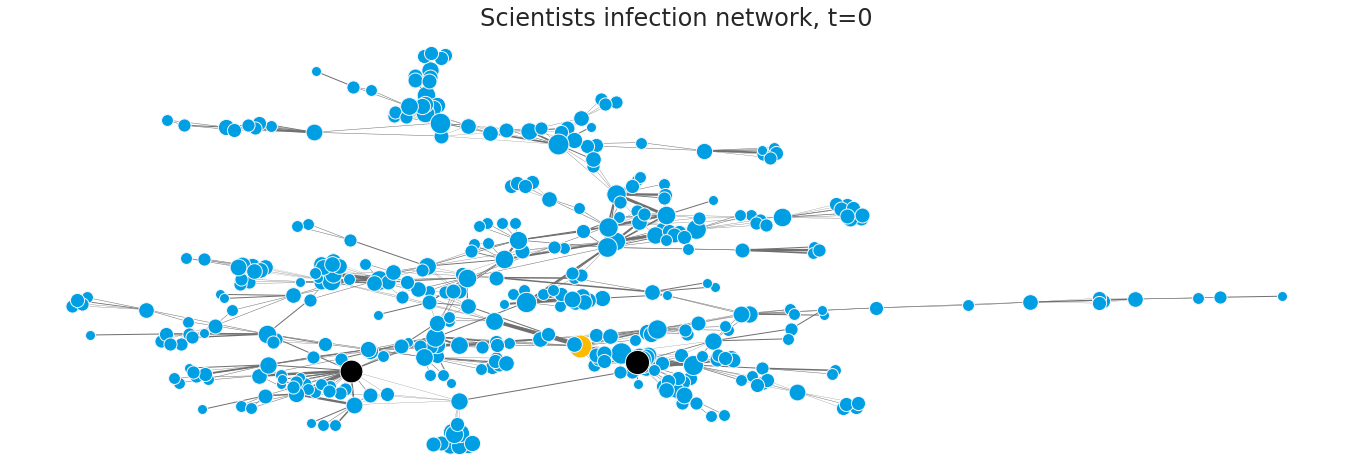

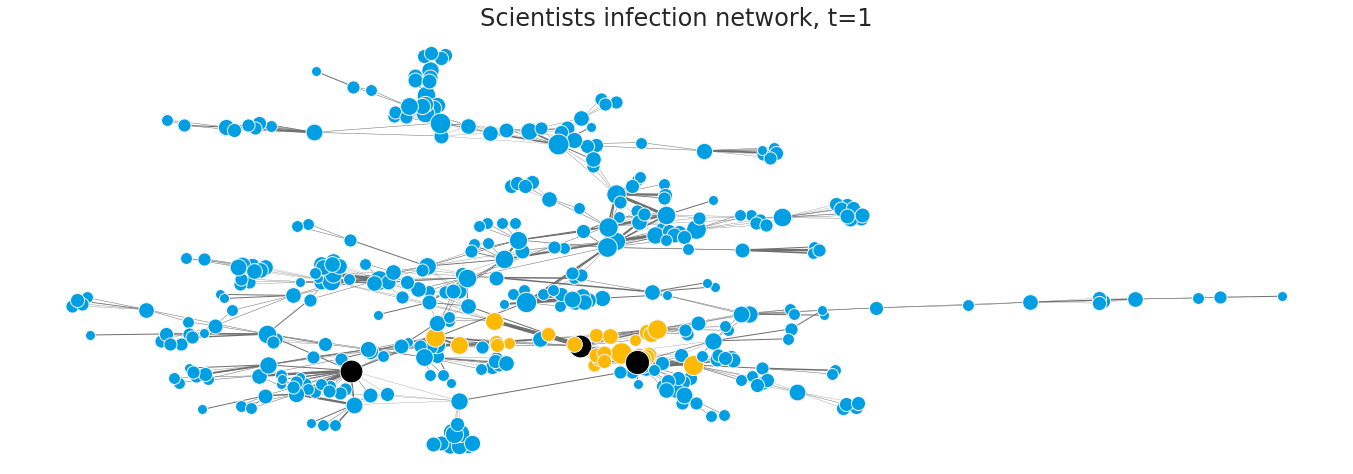

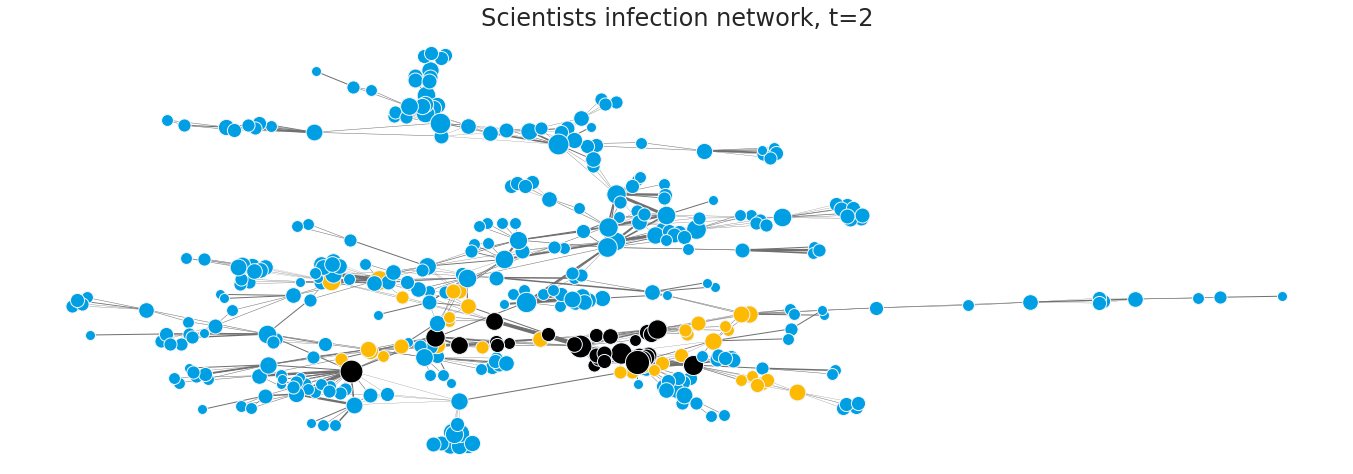

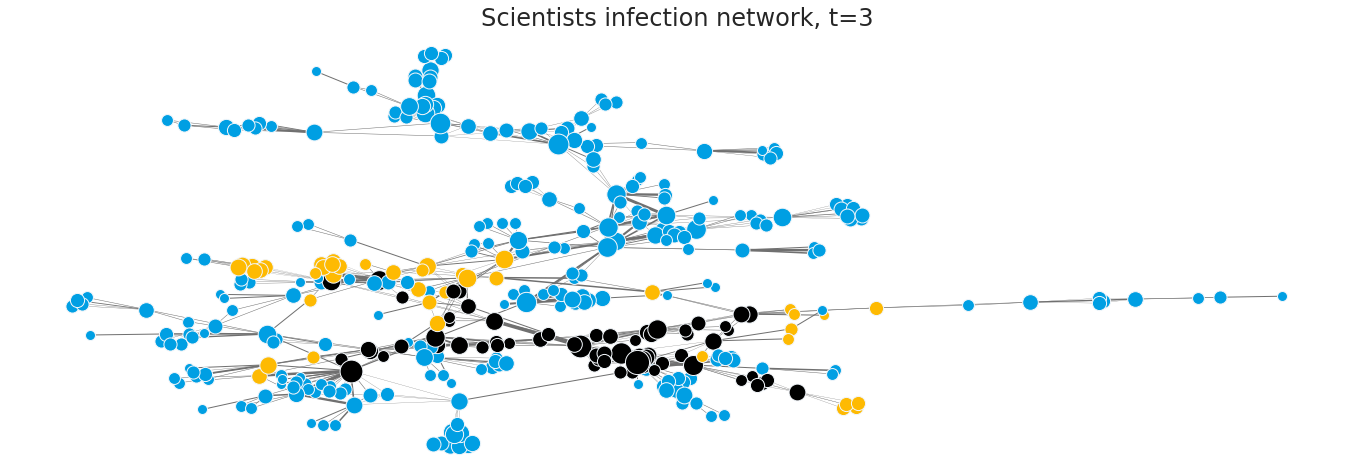

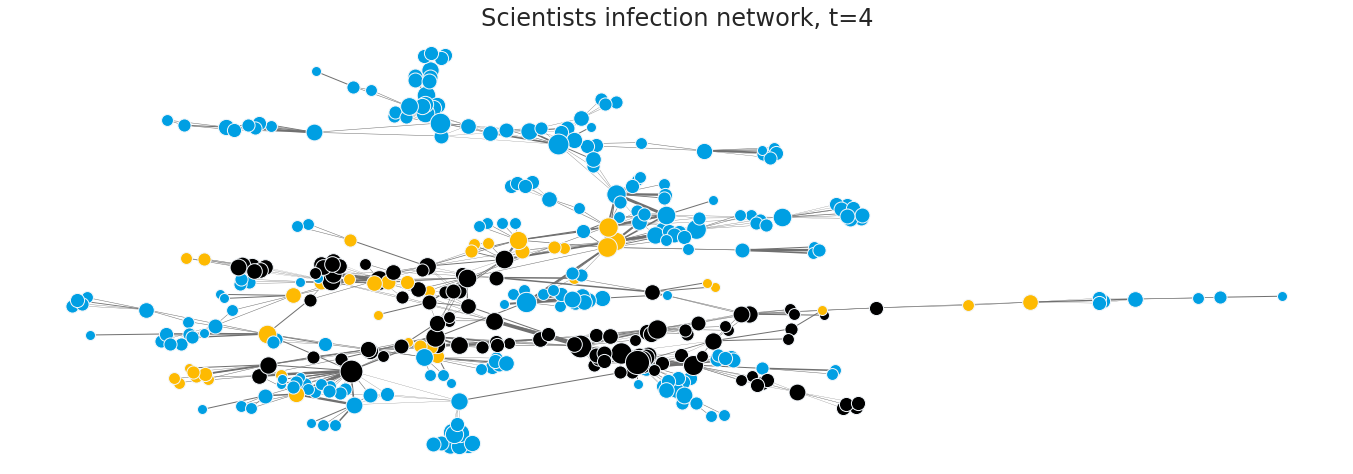

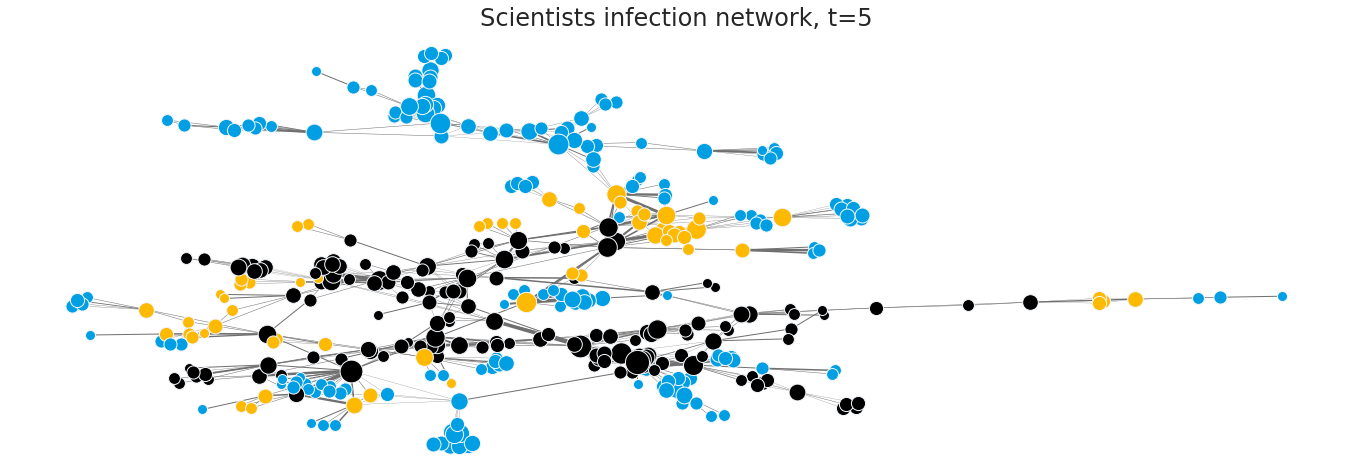

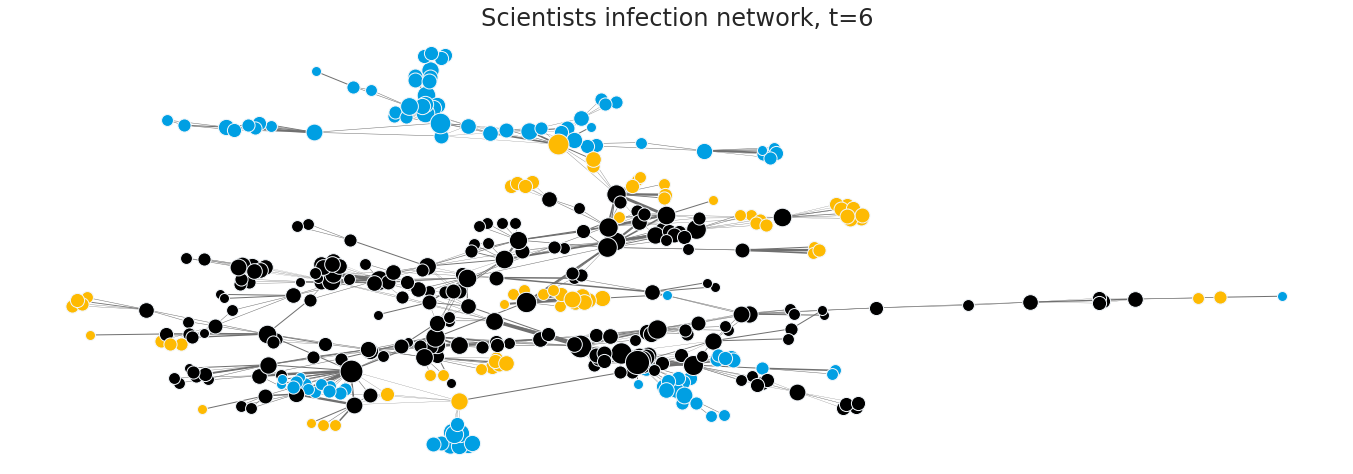

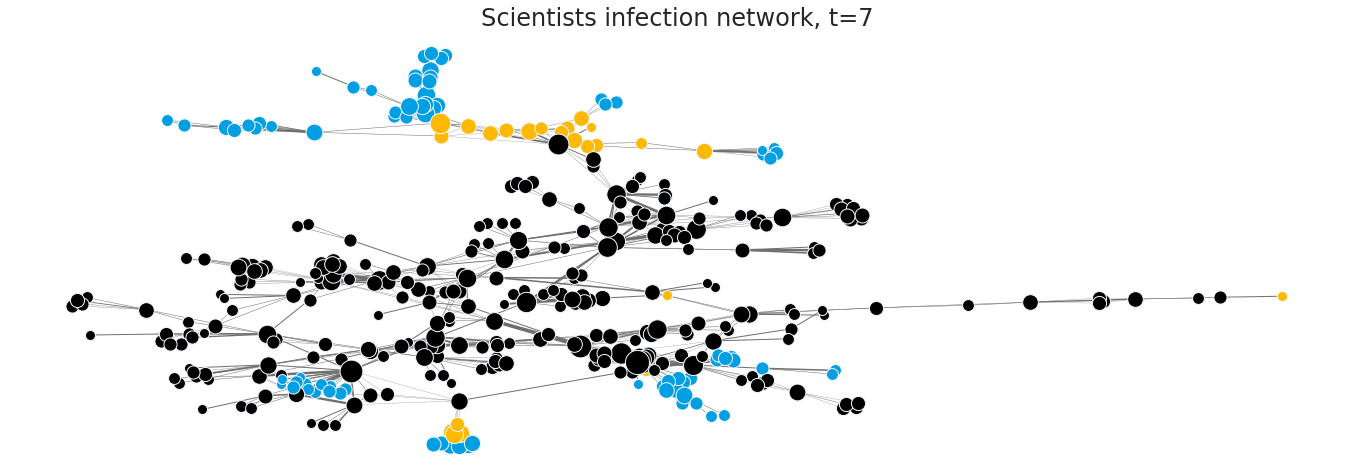

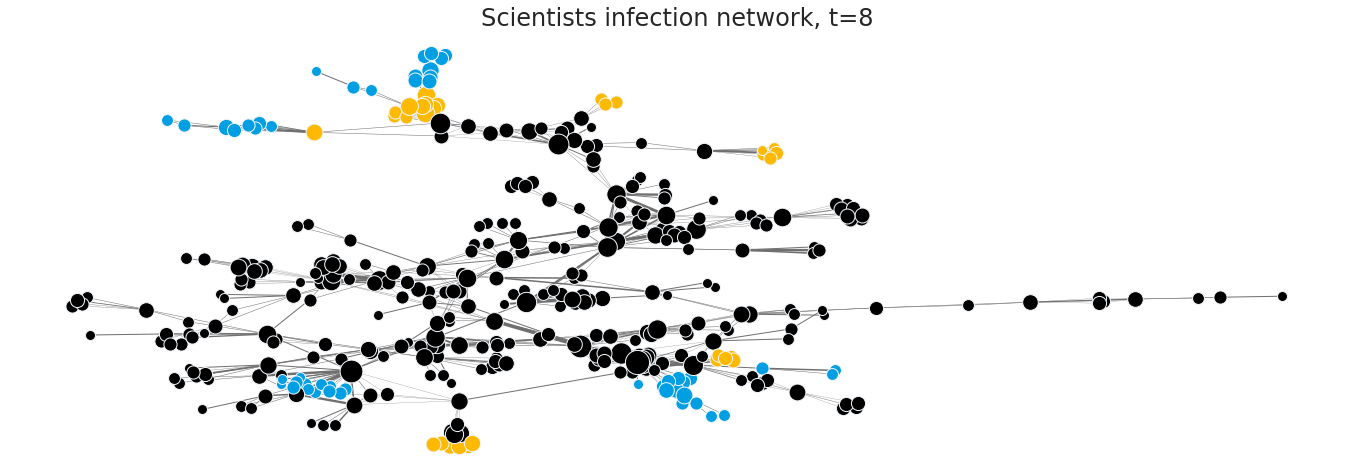

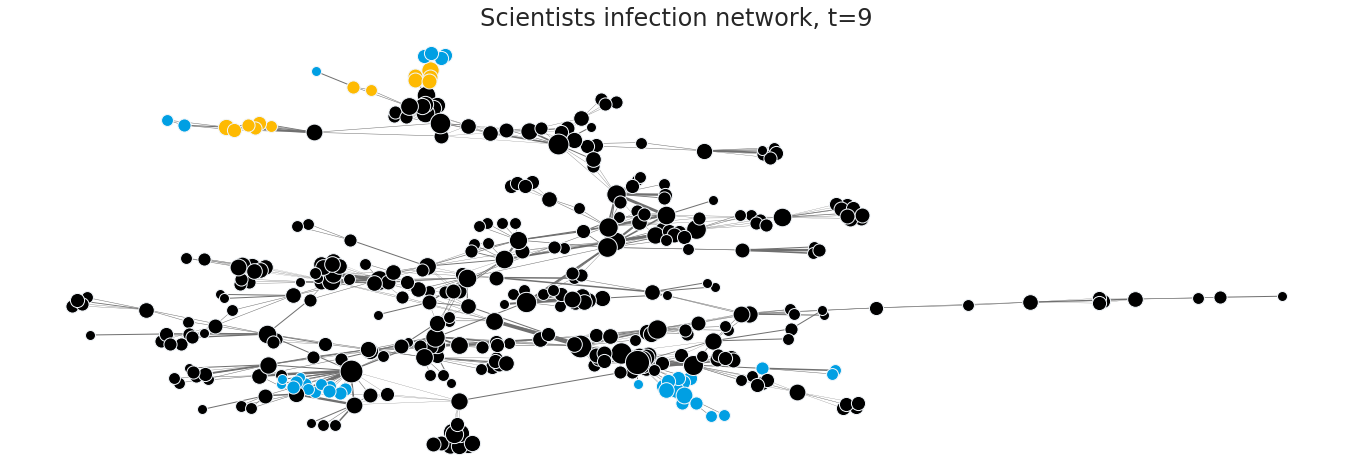

In [ ]:
def independent_cascade(G,t,infection_times):
    #doing a t->t+1 step of independent_cascade simulation
    #each infectious node infects neigbors with probabilty proportional to the weight
    max_weight = int(max(x for x in dict_degree_centrality.values()))
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if  G.get_edge_data(n,v)['value'] >= np.random.random()*max_weight:
                    infection_times[v] = t+1
    return infection_times


infection_times = {'NEWMAN, M':-1, 'BARABASI, A':-1, 'JEONG, H':0}

for t in range(10):
    plot_G(G_sub,pos,infection_times,t)
    infection_times = independent_cascade(G_sub,t,infection_times)